In [33]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from yellowbrick.cluster import KElbowVisualizer    
from sklearn.cluster import AgglomerativeClustering

In [40]:
countrydata = pd.read_csv('Country-data.csv', sep = ',')
datadict = pd.read_csv('data-dictionary.csv', sep = ',')
datadict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Quantos países existem no dataset?

Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

Realize o pré-processamento adequado dos dados.

In [4]:
#Quantos países existem no dataset?
countrydata.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


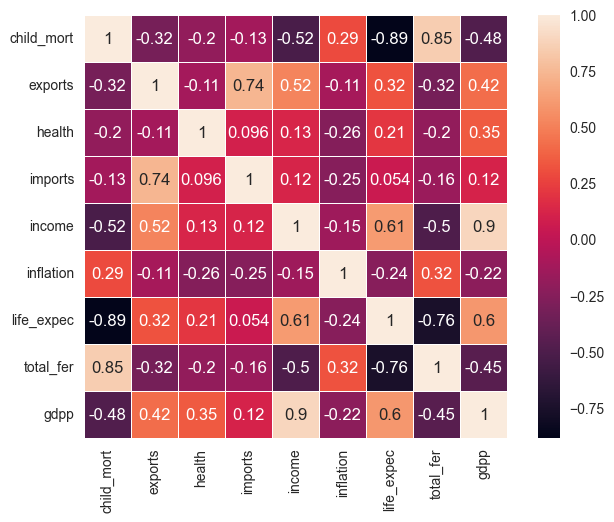

In [5]:
#Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 
#Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
corr = countrydata.corr(method = 'pearson' , numeric_only = True)
sns.heatmap(corr, square = True, linewidths = .5, annot = True);

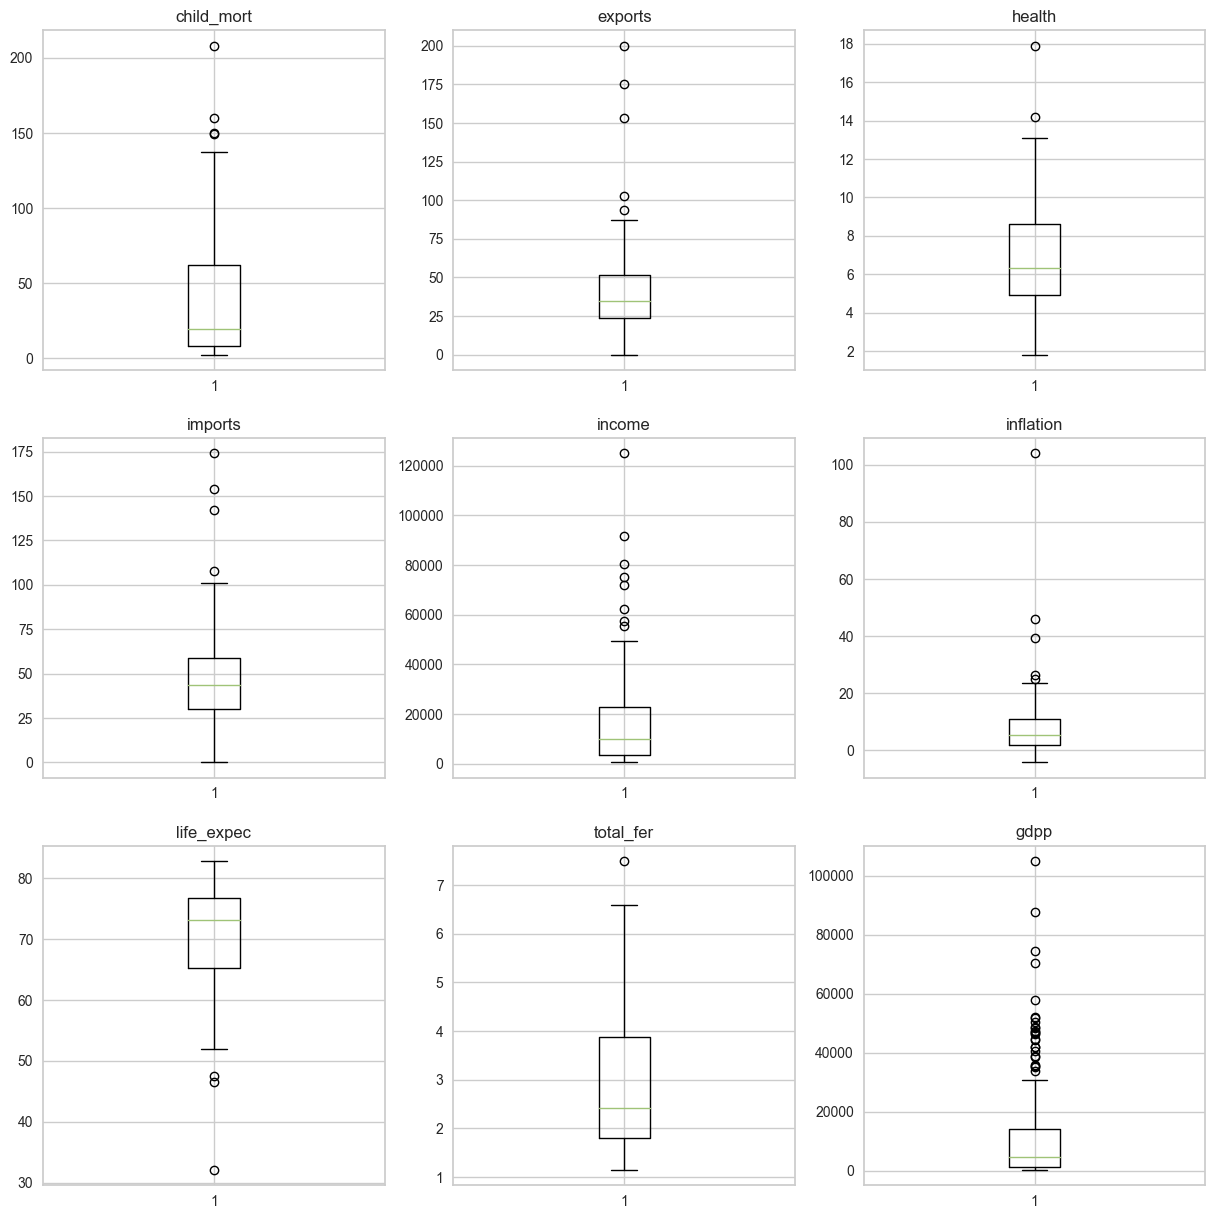

In [6]:
fig, ax = plt.subplots(3 , math.ceil(len(countrydata.iloc[:,1:].columns)/3) , figsize = (15,15))
x,y = 0,0
for column in countrydata.iloc[:,1:].columns:
    ax[ x , y ].set_title(column)
    ax[ x , y ].boxplot(countrydata[column])
    if y == 2: 
        x += 1
        y = 0
    else: y += 1

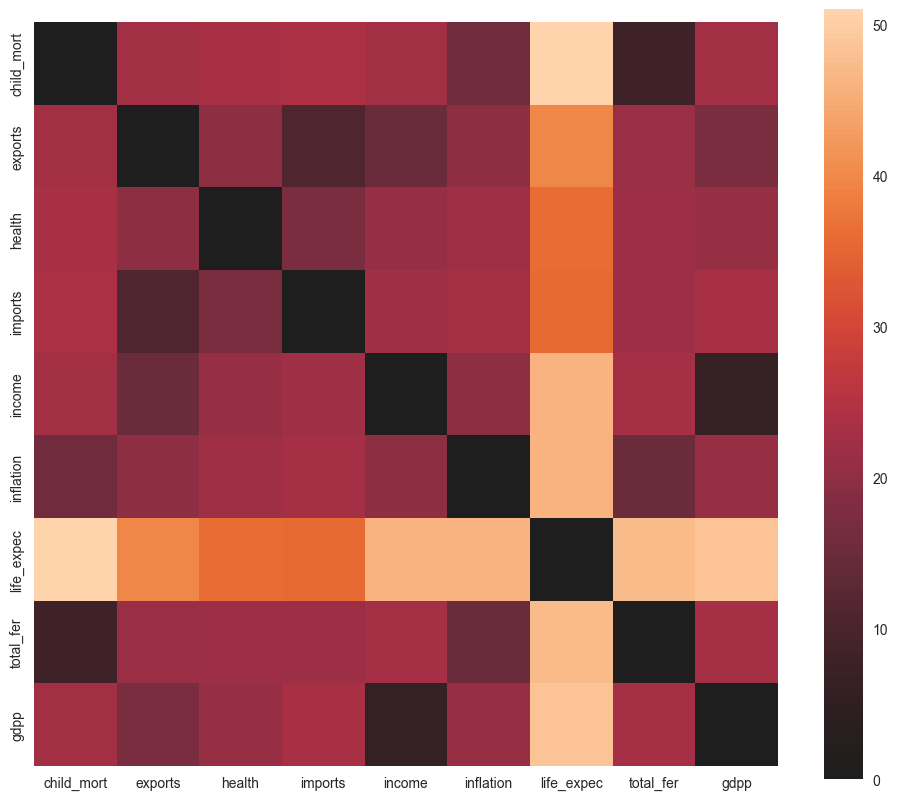

In [7]:
def plot_dist_matrix(df, figsize=(12, 10)):
    dist_mtx = scipy.spatial.distance_matrix(df, df, p=2)
    dist_mtx_df = pd.DataFrame(dist_mtx, index=df.index, columns=df.index)
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(dist_mtx_df, center=0, square=True, annot=False);

plot_dist_matrix(((countrydata.iloc[:,1:] - countrydata.min(numeric_only = True)) / countrydata.std(numeric_only = True)).T)

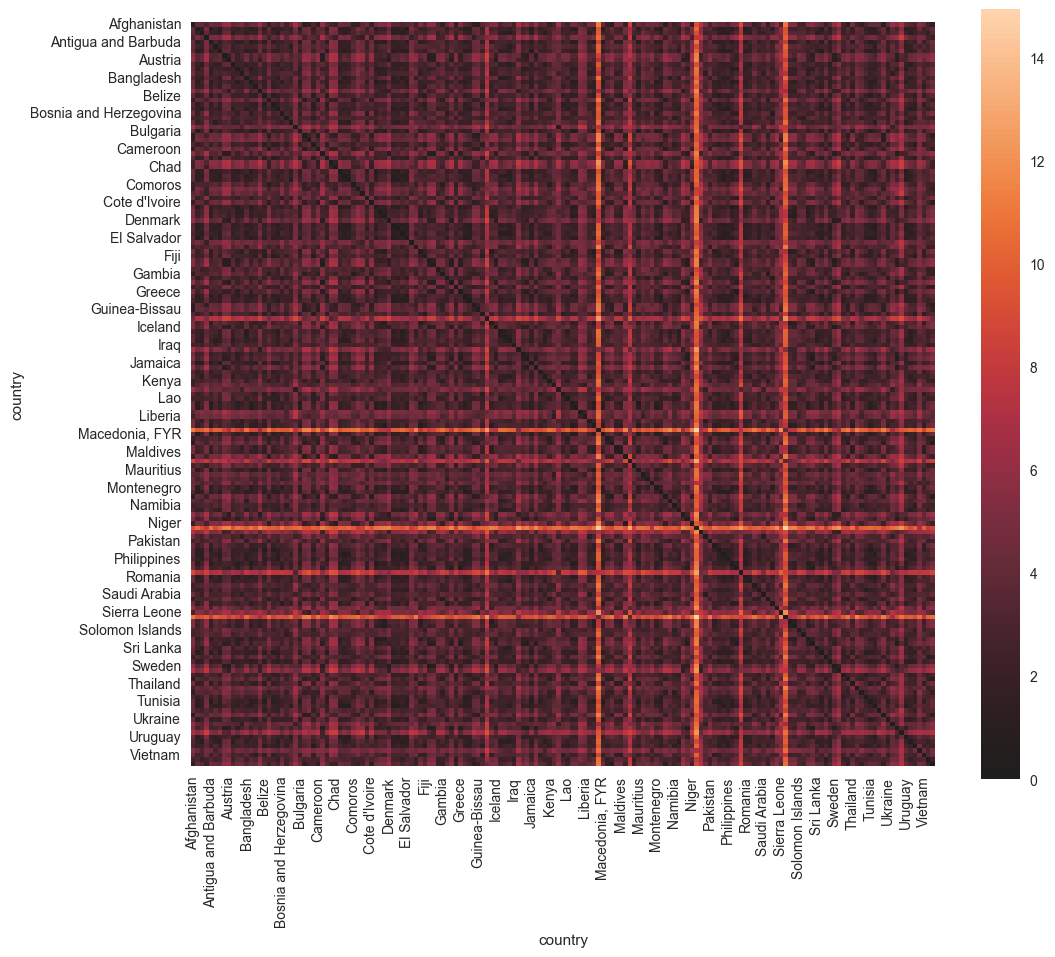

In [8]:
#Realize o pré-processamento adequado dos dados.
df = countrydata.set_index('country')
df_normalized = (df - df.mean()) / df.std()
plot_dist_matrix(df_normalized)

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    K-Médias
    Clusterização Hierárquica

Para os resultados, do K-Médias:
    Interprete cada um dos clusters obtidos citando:
    Qual a distribuição das dimensões em cada grupo
    O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib

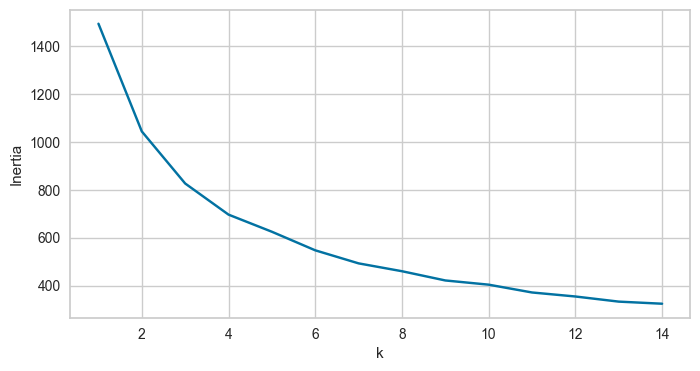

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(df_normalized, kmax = 15)

c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib

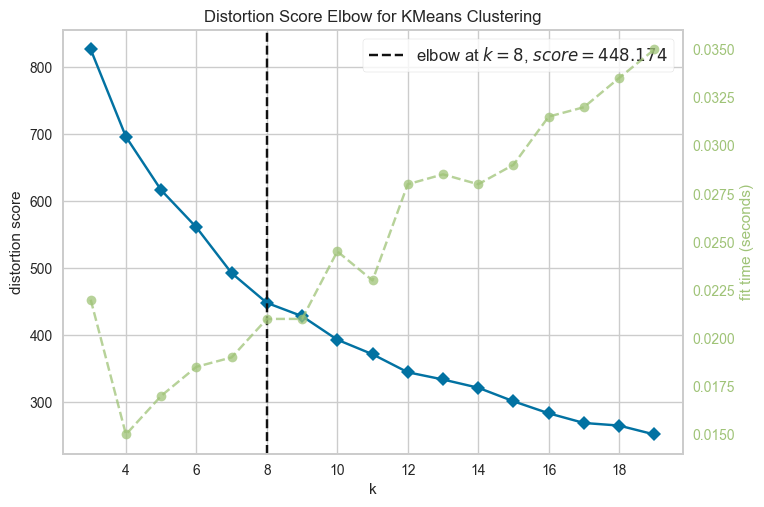

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(3, 20))
visualizer.fit(df_normalized)
visualizer.poof()

c:\Users\Yago Nascimento\.conda\envs\projectcluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


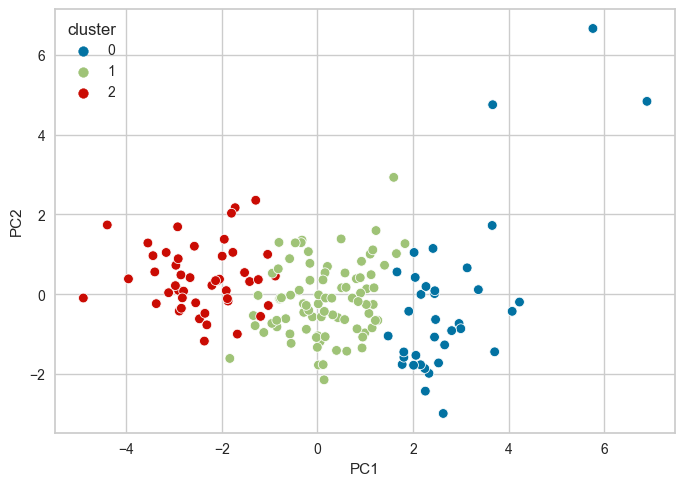

In [11]:
#Para os resultados, do K-Médias:
#    Interprete cada um dos clusters obtidos citando:
#    Qual a distribuição das dimensões em cada grupo
#    O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
k_fit = KMeans(n_clusters = 3).fit(df_normalized)
def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)

plot_cluster_points(df_normalized, k_fit.labels_)

[152 147  53]


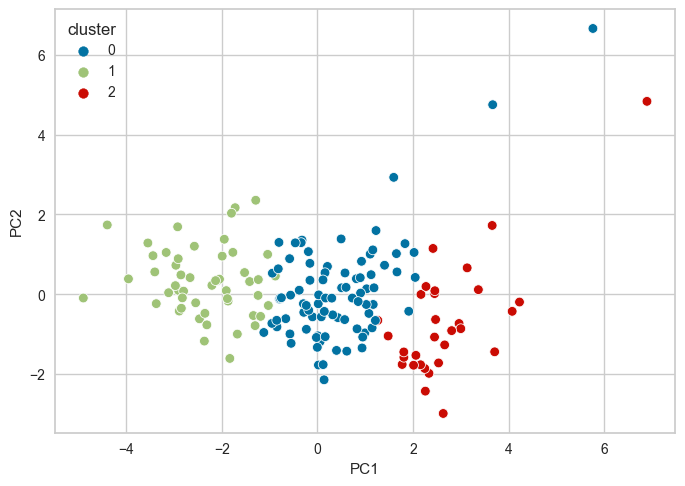

In [23]:
from sklearn_extra.cluster import KMedoids
kmedoid = KMedoids(n_clusters = 3, method = 'pam').fit(df_normalized)
plot_cluster_points(df_normalized, kmedoid.labels_)
print( kmedoid.medoid_indices_)

In [25]:
countrydata.iloc[kmedoid.medoid_indices_ , :]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
152,Tunisia,17.4,50.5,6.21,55.3,10400,3.820,76.9,2.14,4140
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200


Text(0, 0.5, 'Euclidean Distance')

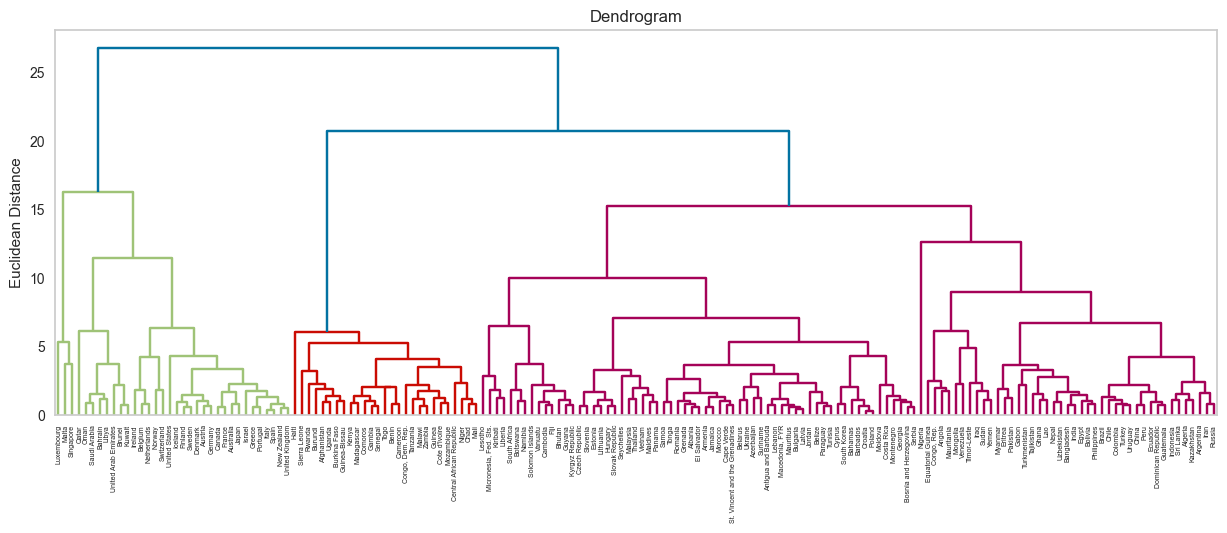

In [31]:
#Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

#Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_normalized, method='ward'), labels=df_normalized.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

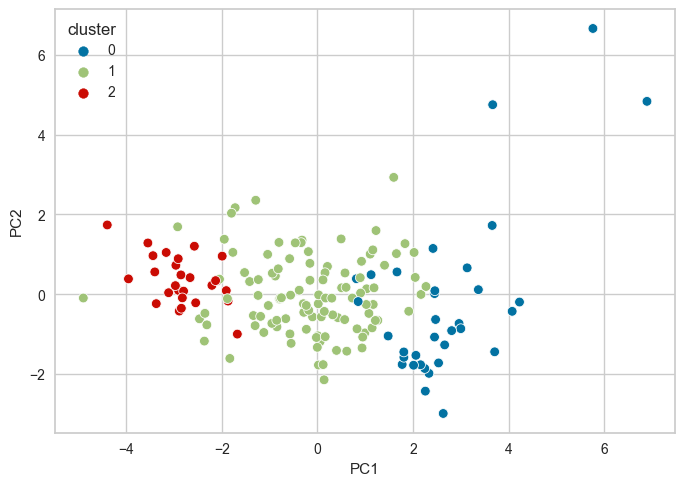

In [34]:
agg_model = AgglomerativeClustering(n_clusters=3).fit(df_normalized)
plot_cluster_points(df_normalized, agg_model.labels_)
